In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('plots/paper.mplstyle')

from scipy.optimize import curve_fit

def powerlaw(x,a,b,c):
    return a-c*x**b

In [3]:
overview = pd.read_csv("results/overview_synthetic_data.csv")
overview[overview["typ"]=="train"].tail(10)

,tstamp,typ,outpath,u_ld_0,u_ld_1,emin,emax,alphamin,alphamax,betamin,betamax,size_lc,errval,spot_radius,midlat,latwidth,n_spots_min,n_spots_max,decomposeed,n_lcs
170,2022_03_31_14_13,train,results/2022_03_31_14_13_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,4.0,7.0,2000,5.000000e-12,0.01,random,5,3,5,decompose_ed_from_UCDs_and_Davenport,100000
172,2022_03_31_14_41,train,results/2022_03_31_14_41_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,2.0,4.0,2000,5.000000e-12,0.01,random,5,3,5,decompose_ed_from_UCDs_and_Davenport,100000
174,2022_03_31_15_04,train,results/2022_03_31_15_04_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1.0,2.0,2000,5.000000e-12,0.01,random,5,3,5,decompose_ed_from_UCDs_and_Davenport,100000
176,2022_03_31_15_25,train,results/2022_03_31_15_25_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,2.0,4.0,2000,5.000000e-12,0.01,random,5,1,1,decompose_ed_from_UCDs_and_Davenport,100000
178,2022_03_31_17_08,train,results/2022_03_31_17_08_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1.0,2.0,2000,5.000000e-12,0.01,random,5,1,3,decompose_ed_from_UCDs_and_Davenport,100000
180,2022_03_31_17_29,train,results/2022_03_31_17_29_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1.0,2.0,2000,5.000000e-12,0.01,random,5,1,3,decompose_ed_from_UCDs_and_Davenport,100000
182,2022_03_31_17_47,train,results/2022_03_31_17_47_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,15.0,25.0,2000,5.000000e-12,0.01,random,5,3,5,decompose_ed_from_UCDs_and_Davenport,100000
184,2022_03_31_18_16,train,results/2022_03_31_18_16_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1.0,1.0,2000,5.000000e-12,0.01,random,5,3,5,decompose_ed_from_UCDs_and_Davenport,100000
186,2022_03_31_18_50,train,results/2022_03_31_18_50_flares_train.csv,0.5079,0.2239,0.1,1000000.0,2.5,2.5,10.0,20.0,2000,5.000000e-12,0.01,random,5,1,1,decompose_ed_from_UCDs_and_Davenport,100000
188,2022_03_31_19_41,train,results/2022_03_31_19_41_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,1.5,10.0,20.0,2000,5.000000e-12,0.01,random,5,1,1,decompose_ed_from_UCDs_and_Davenport,100000


In [6]:
# select test runs to plot
tstamps = [("2022_03_24_15_52_2022_03_24_15_18", 
            fr"$\alpha$ = 1.5-2.5, bihem., 1 spot, lat = 5 deg", 
            "#009E73"),
           ("2022_03_31_19_36_2022_03_31_18_50",
            fr"$\alpha$ = 2.5, bihem., 1 spot, lat = 5 deg", 
            "#56B4E9"),
           ("2022_03_24_16_18_2022_03_24_16_02", 
            fr"$\alpha$ = 2.0, bihem., 1 spot, lat = 5 deg", 
            "#230072B2"),
           ("2022_03_31_19_57_2022_03_31_19_41",
            fr"$\alpha$ = 1.5, bihem., 1 spot, lat = 5 deg", 
            "#CC79A7"),]
        

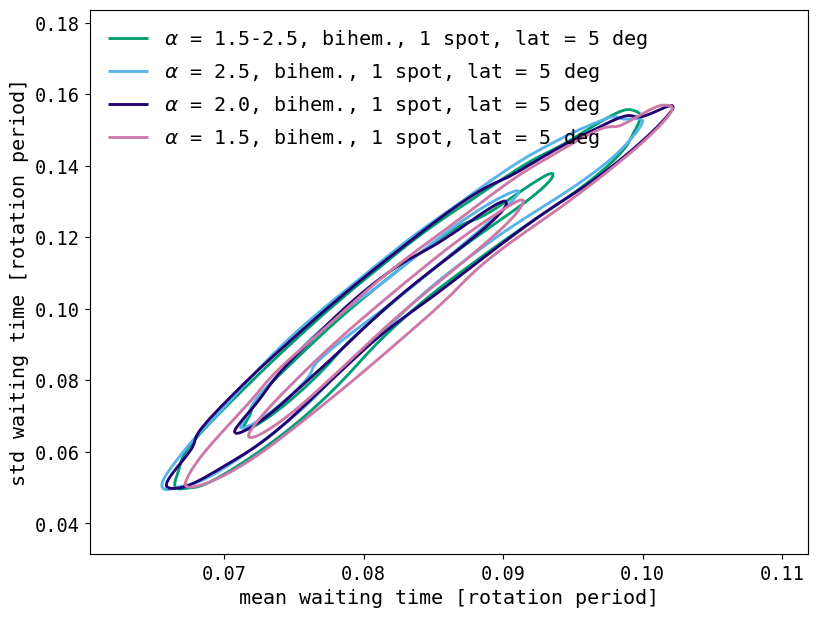

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,7))

for tstamp, label,c in tstamps:
    
    df = pd.read_csv(f"results/{tstamp}_flares_train_merged.csv")

    newcol = "mean waiting time"
    _ = df[(df.midlat2 > 3.) & (df.midlat2 < 87.) & (~df["diff_tstart_std_stepsize1"].isnull())]
    
    
    meanfreq= _["diff_tstart_nflares_stepsize1"] / _["diff_tstart_nstars_stepsize1"]
    _[newcol] = _["diff_tstart_mean_stepsize1"]#1/meanfreq

    _ = _.sort_values(by="midlat2",ascending=True)
    x = _.midlat2.values
  
    
    sns.kdeplot(x=_[newcol]/2./np.pi, y=_["diff_tstart_std_stepsize1"]/2./np.pi,
                label=label,color=c, alpha=1, levels=3)

#     sc = ax.scatter(_[newcol]/2./np.pi, _["diff_tstart_std_stepsize1"]/2./np.pi, 
#                          s=30, c=x, cmap='viridis',alpha=.5,marker="o",)


    ax.set_ylabel("std waiting time [rotation period]", fontsize=14)#
    ax.set_xlabel("mean waiting time [rotation period]", fontsize=14)
    
ax.legend(loc=2,fontsize=14, frameon=False);
# cbar = plt.colorbar(sc)
# cbar.set_label('flaring region latitude [deg]', fontsize=14);
# plt.savefig("plots/2022_03_24_single_spot_std_and_mean_waiting_time_mapping_variable_alpha.png", dpi=300)

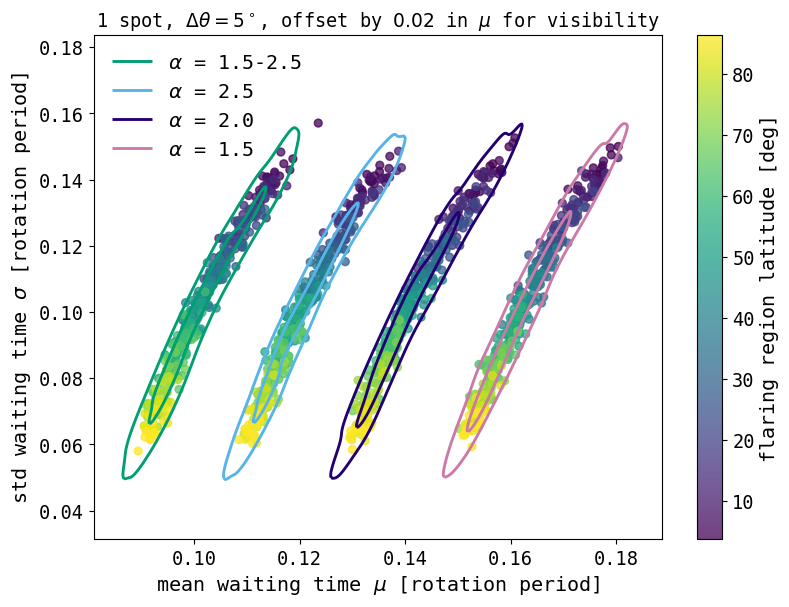

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
j = 0.
for tstamp, label, c in tstamps:
    
    df = pd.read_csv(f"results/{tstamp}_flares_train_merged.csv")

    newcol = "mean waiting time"
    _ = df[(df.midlat2 > 3.) & (df.midlat2 < 87.) & (~df["diff_tstart_std_stepsize1"].isnull())]
    _[newcol] = _["diff_tstart_mean_stepsize1"]#1/meanfreq

    j+=0.02
    _ = _.sort_values(by="midlat2",ascending=True)
    x = _.midlat2.values
        
    sc = ax.scatter(_[newcol]/2./np.pi+j, _["diff_tstart_std_stepsize1"]/2./np.pi, 
                         s=30, c=x, cmap="viridis",alpha=.75,marker="o",)
    sns.kdeplot(x=_[newcol]/2./np.pi+j, y=_["diff_tstart_std_stepsize1"]/2./np.pi,
                label=label.split(", bih")[0],color=c, alpha=1, levels=3)


    ax.set_ylabel(r"std waiting time $\sigma$ [rotation period]", fontsize=14)#
    ax.set_xlabel(r"mean waiting time $\mu$ [rotation period]", fontsize=14)

ax.legend(loc=2,fontsize=14, frameon=False);
cbar = plt.colorbar(sc)
cbar.set_label('flaring region latitude [deg]', fontsize=14)

plt.title(r"1 spot, $\Delta\theta=5^\circ$, offset by $0.02$ in $\mu$ for visibility",fontsize=13)
plt.tight_layout()
plt.savefig("plots/single_spot_variable_alpha.png", dpi=300)

In [1]:
import matplotlib

In [2]:
matplotlib.__version__

'3.6.2'